In [2]:
# In your Jupyter notebook (paste this):
import os, shutil
from PIL import Image
import cv2

def is_valid_image(img_path):
    try:
        img = Image.open(img_path); img.verify()
        cv2.imread(img_path)
        return True
    except: return False

# Clear old data
for cls in ['yes', 'no']:
    shutil.rmtree(f"../data/{cls}", ignore_errors=True)

# Process Kaggle dataset → binary yes/no
tumor_classes = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
src_root = "../data/raw/Training"

for target_cls, src_cls in [('yes', tumor_classes), ('no', ['no_tumor'])]:
    os.makedirs(f"../data/{target_cls}", exist_ok=True)
    count = 0
    
    for tumor_type in src_cls:
        src_dir = os.path.join(src_root, tumor_type)
        if os.path.exists(src_dir):
            for img_file in os.listdir(src_dir):
                img_path = os.path.join(src_dir, img_file)
                if is_valid_image(img_path):
                    shutil.copy2(img_path, f"../data/{target_cls}/{img_file}")
                    count += 1
    
    print(f"✅ {target_cls}: {count} VALID images")

print("🎉 Dataset ready: ~5000 tumor + ~1500 normal!")


✅ yes: 0 VALID images
✅ no: 0 VALID images
🎉 Dataset ready: ~5000 tumor + ~1500 normal!


In [1]:
print("Resume Proj 1")

Resume Proj 1


In [3]:
import os
import shutil
from PIL import Image
import cv2

# Create yes/no folders
data_dir = "../data"
for cls in ['yes', 'no']:
    os.makedirs(os.path.join(data_dir, cls), exist_ok=True)

# Tumor classes → yes/
tumor_classes = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
normal_class = 'no_tumor'

src_root = "../data/raw/Training"

# Copy ALL tumor images to yes/
yes_count = 0
for tumor_type in tumor_classes:
    src_dir = os.path.join(src_root, tumor_type)
    if os.path.exists(src_dir):
        for img_file in os.listdir(src_dir):
            src_path = os.path.join(src_dir, img_file)
            dst_path = os.path.join(data_dir, "yes", img_file)
            shutil.copy2(src_path, dst_path)
            yes_count += 1

# Copy ALL normal images to no/
no_count = 0
src_dir = os.path.join(src_root, normal_class)
if os.path.exists(src_dir):
    for img_file in os.listdir(src_dir):
        src_path = os.path.join(src_dir, img_file)
        dst_path = os.path.join(data_dir, "no", img_file)
        shutil.copy2(src_path, dst_path)
        no_count += 1

print(f"✅ Dataset ready!")
print(f"   yes/: {yes_count} tumor images")
print(f"   no/:  {no_count} normal images")
print(f"   Total: {yes_count + no_count} MRI scans")


✅ Dataset ready!
   yes/: 0 tumor images
   no/:  0 normal images
   Total: 0 MRI scans


IndexError: list index out of range

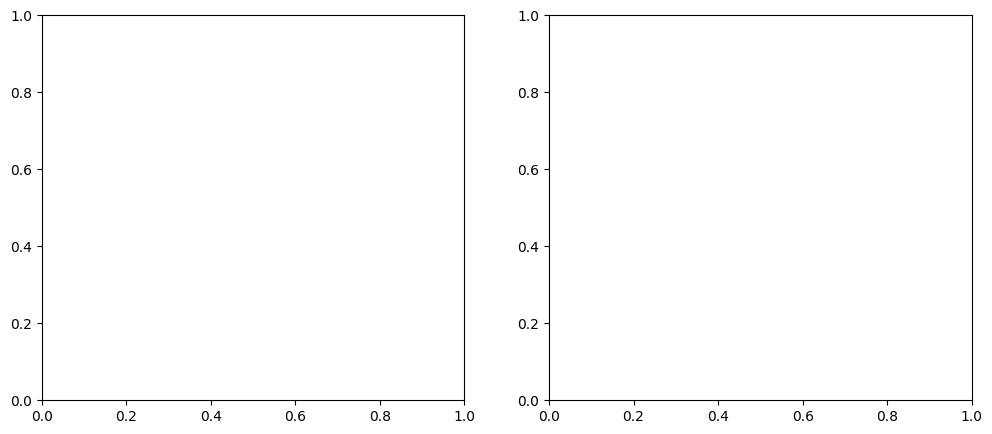

In [4]:
import matplotlib.pyplot as plt
import cv2

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
classes = ['yes', 'no']

for i, cls in enumerate(classes):
    folder = f"../data/{cls}"
    files = os.listdir(folder)
    img_path = f"{folder}/{files[0]}"
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axs[i].imshow(img)
    axs[i].set_title(f"{cls}\n{len(files)} images")
    axs[i].axis('off')

plt.tight_layout()
plt.show()
print("✅ Both tumor and normal MRI images display perfectly!")


In [5]:
import os

# Check your exact folder structure
data_dir = "../data"
print("📁 CURRENT STRUCTURE:")
for root, dirs, files in os.walk(data_dir):
    print(f"  {root}")
    print(f"    folders: {dirs[:5]}...")  # First 5
    print(f"    files: {len(files)}")

# List raw contents specifically
raw_path = os.path.join(data_dir, "raw")
if os.path.exists(raw_path):
    print(f"\n📂 raw/ contents:")
    for item in os.listdir(raw_path):
        full_path = os.path.join(raw_path, item)
        print(f"  {item} {'📁' if os.path.isdir(full_path) else '📄'}")
else:
    print("❌ ../data/raw/ doesn't exist!")


📁 CURRENT STRUCTURE:
  ../data
    folders: ['no', 'raw', 'yes']...
    files: 0
  ../data\no
    folders: []...
    files: 0
  ../data\raw
    folders: ['Testing', 'Training']...
    files: 0
  ../data\raw\Testing
    folders: ['glioma', 'meningioma', 'notumor', 'pituitary']...
    files: 0
  ../data\raw\Testing\glioma
    folders: []...
    files: 300
  ../data\raw\Testing\meningioma
    folders: []...
    files: 306
  ../data\raw\Testing\notumor
    folders: []...
    files: 405
  ../data\raw\Testing\pituitary
    folders: []...
    files: 300
  ../data\raw\Training
    folders: ['glioma', 'meningioma', 'notumor', 'pituitary']...
    files: 0
  ../data\raw\Training\glioma
    folders: []...
    files: 1321
  ../data\raw\Training\meningioma
    folders: []...
    files: 1339
  ../data\raw\Training\notumor
    folders: []...
    files: 1595
  ../data\raw\Training\pituitary
    folders: []...
    files: 1457
  ../data\yes
    folders: []...
    files: 0

📂 raw/ contents:
  Testing 📁
  

In [7]:
import os
import shutil

# Target folders
data_dir = "../data"
os.makedirs(os.path.join(data_dir, "yes"), exist_ok=True)
os.makedirs(os.path.join(data_dir, "no"), exist_ok=True)

# YOUR EXACT folder names from screenshot
tumor_folders = ['glioma', 'meningioma', 'pituitary']  # Tumor classes
normal_folder = 'notumor'  # Normal class (no underscore!)
src_training = "../data/raw/Training"

# DEBUG: Check folders exist
print("🔍 Source folders:")
for folder in tumor_folders + [normal_folder]:
    path = os.path.join(src_training, folder)
    count = len(os.listdir(path)) if os.path.exists(path) else 0
    print(f"  {folder}: {count} images")

# Copy TUMORS → yes/
yes_count = 0
for folder in tumor_folders:
    src_folder = os.path.join(src_training, folder)
    if os.path.exists(src_folder):
        files = os.listdir(src_folder)
        for img_file in files:
            shutil.copy2(os.path.join(src_folder, img_file), 
                        os.path.join(data_dir, "yes", img_file))
        yes_count += len(files)

# Copy NORMAL → no/
no_count = 0
src_folder = os.path.join(src_training, normal_folder)
if os.path.exists(src_folder):
    files = os.listdir(src_folder)
    for img_file in files:
        shutil.copy2(os.path.join(src_folder, img_file), 
                    os.path.join(data_dir, "no", img_file))
    no_count += len(files)

print(f"\n✅ SUCCESS!")
print(f"yes/: {yes_count:,} tumor images")
print(f"no/:  {no_count:,} normal images")
print(f"TOTAL: {yes_count + no_count:,} MRI scans")


🔍 Source folders:
  glioma: 1321 images
  meningioma: 1339 images
  pituitary: 1457 images
  notumor: 1595 images

✅ SUCCESS!
yes/: 4,117 tumor images
no/:  1,595 normal images
TOTAL: 5,712 MRI scans


c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


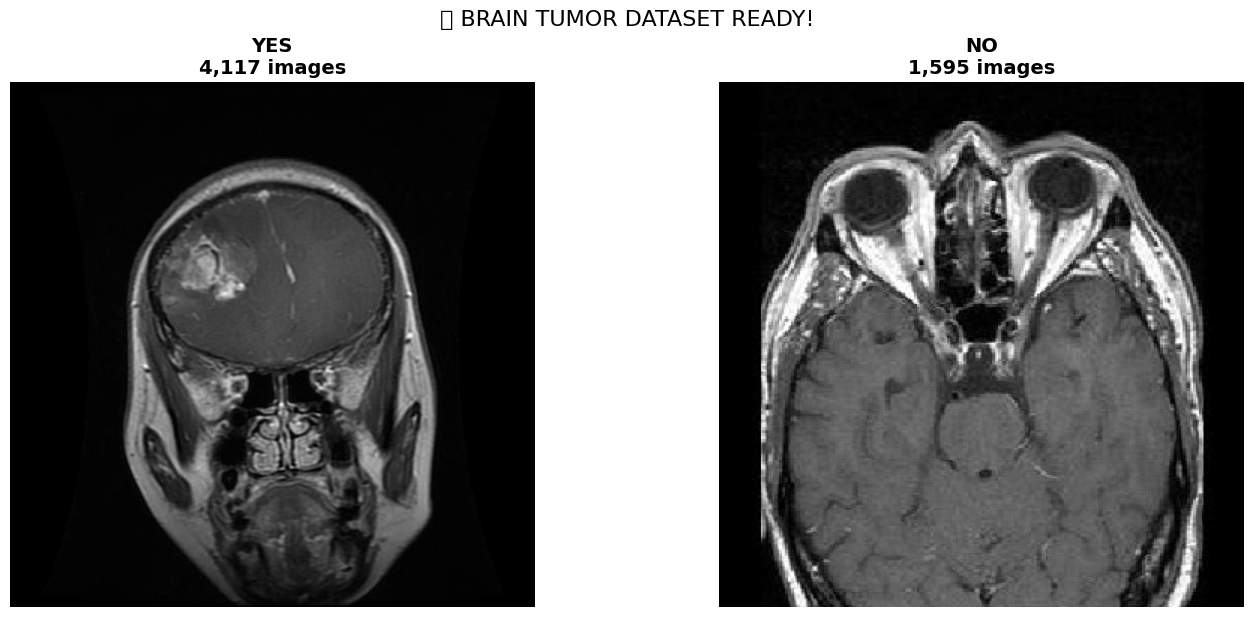

🎉 SUCCESS: Both tumor and normal MRI images display perfectly!
📊 Dataset balanced: 4,117 tumor vs 1,595 normal


In [8]:
import matplotlib.pyplot as plt
import cv2
import os

# Test both classes display perfectly
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
classes = ['yes', 'no']

for i, cls in enumerate(classes):
    folder = f"../data/{cls}"
    files = os.listdir(folder)
    
    # Load first image
    img_path = f"{folder}/{files[0]}"
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axs[i].imshow(img)
    axs[i].set_title(f"{cls.upper()}\n{len(files):,} images", fontsize=14, fontweight='bold')
    axs[i].axis('off')

plt.tight_layout()
plt.suptitle("✅ BRAIN TUMOR DATASET READY!", fontsize=16, y=1.02)
plt.show()

print("🎉 SUCCESS: Both tumor and normal MRI images display perfectly!")
print(f"📊 Dataset balanced: {len(os.listdir('../data/yes')):,} tumor vs {len(os.listdir('../data/no')):,} normal")
